#### Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)

In [2]:
df=pd.read_csv("data.csv")
df.head()

,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91712 entries, 0 to 91711
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             91712 non-null  object 
 1   TIME             91712 non-null  object 
 2   PICK UP ADDRESS  91712 non-null  object 
 3   Unnamed: 3       0 non-null      float64
 4   Unnamed: 4       0 non-null      float64
 5   Unnamed: 5       0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 4.2+ MB


#### Data preparation

* Removing unwanted column

In [4]:
df1=df.drop(["Unnamed: 3","Unnamed: 4","Unnamed: 5"],axis=1)
df1

,DATE,TIME,PICK UP ADDRESS
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX"
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX"
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX"
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX"
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX"
...,...,...,...
91707,9/30/2014,11:47:00 PM,"593 Oak Ter Mott Haven, BX"
91708,9/30/2014,11:48:00 PM,"645 Westchester Ave South Bronx, BX"
91709,9/30/2014,11:51:00 PM,"625 Tinton Ave South Bronx, BX"
91710,9/30/2014,11:54:00 PM,"350 Saint Anns Ave Mott Haven, BX"


* Formatting the date and adding the month/day of month/day of week column

In [5]:
df1["date_time"]=df[["DATE","TIME"]].agg("-".join,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91712 entries, 0 to 91711
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             91712 non-null  object
 1   TIME             91712 non-null  object
 2   PICK UP ADDRESS  91712 non-null  object
 3   date_time        91712 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [9]:
df1["date_time"]=pd.to_datetime(df1["date_time"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91712 entries, 0 to 91711
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             91712 non-null  object        
 1   TIME             91712 non-null  object        
 2   PICK UP ADDRESS  91712 non-null  object        
 3   date_time        91712 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


In [24]:
df1["month"]=df1["date_time"].dt.month_name()
df1["day_of_month"]=df1["date_time"].dt.day
df1["day_of_week"]=df1["date_time"].dt.day_name()
df1["hour_of_day"]=df1["date_time"].dt.hour
df1.head()

,DATE,TIME,PICK UP ADDRESS,date_time,month,day_of_month,day_of_week,hour_of_day
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",2014-07-01 00:00:00,July,1,Tuesday,0
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",2014-07-01 00:01:00,July,1,Tuesday,0
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",2014-07-01 00:01:00,July,1,Tuesday,0
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",2014-07-01 00:01:00,July,1,Tuesday,0
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",2014-07-01 00:02:00,July,1,Tuesday,0


#### data Analysis

* Trips rate per day of month

Text(0.5, 1.0, 'trips per day of month')

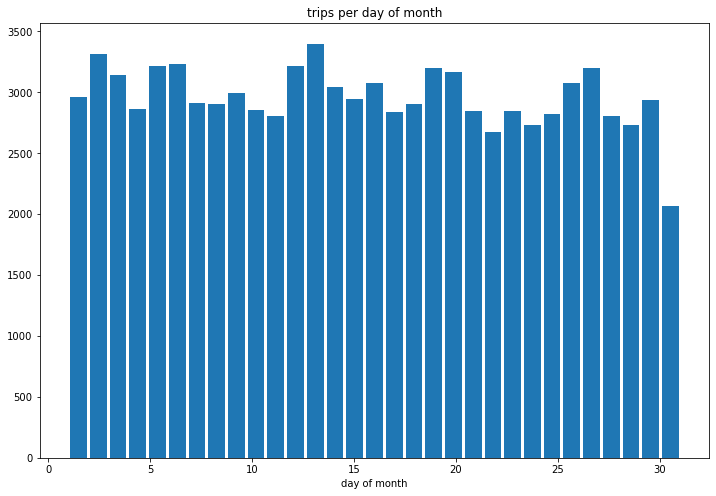

In [41]:
df1["day_of_month"].value_counts()
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(df1["day_of_month"],bins=31,rwidth=0.85)
plt.xlabel("day of month")
plt.title("trips per day of month")

* Trips rate per hours of the day

Text(0.5, 0, 'hour')

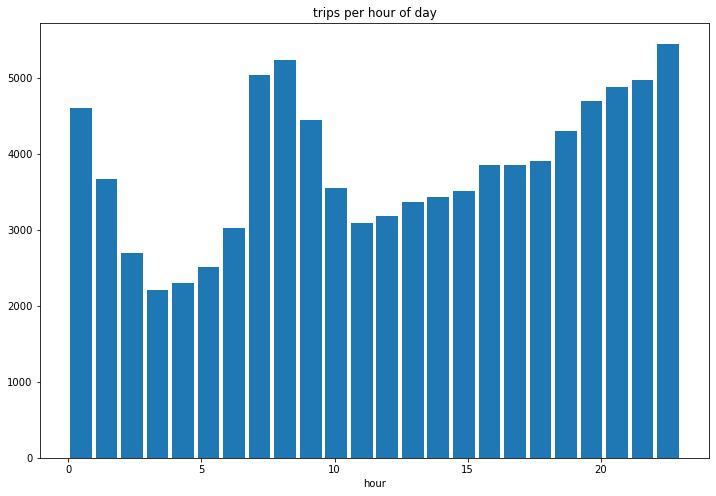

In [42]:
df1["hour_of_day"].value_counts()
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(df1["hour_of_day"],bins=24,rwidth=0.85)
plt.title("trips per hour of day")
plt.xlabel("hour")

* Trips rate per day of the week

Text(0.5, 0, 'day')

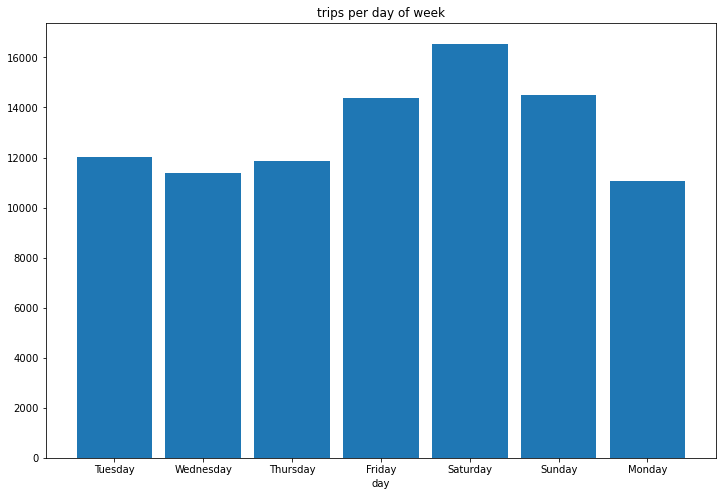

In [40]:
df1["day_of_week"].value_counts()
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(df1["day_of_week"],bins=7,rwidth=0.85,range=(-.5,6.5))
plt.title("trips per day of week")
plt.xlabel("day")

* Cross analysis (days/hours)

In [32]:
dh_cross=pd.crosstab(df1["day_of_week"],df1["hour_of_day"])
dh_cross

hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,562,415,305,217,272,362,504,807,865,701,...,556,528,616,609,734,770,876,875,871,972
Monday,550,466,270,215,234,293,440,749,816,604,...,427,394,434,442,387,470,483,560,508,621
Saturday,962,826,655,589,505,483,405,488,514,564,...,542,638,701,672,762,882,971,1000,1144,1223
Sunday,1136,955,761,567,508,497,380,462,360,479,...,508,597,603,543,540,624,715,773,781,693
Thursday,450,334,223,216,267,294,399,830,875,746,...,430,434,489,542,530,538,508,569,627,726
Tuesday,495,352,261,193,249,310,435,866,947,708,...,532,500,551,520,445,529,586,536,522,612
Wednesday,441,322,220,212,267,271,455,831,855,642,...,437,419,454,527,499,481,557,569,516,599


Text(0.5, 1.0, 'heat map represents the peak hours and slow hours by days')

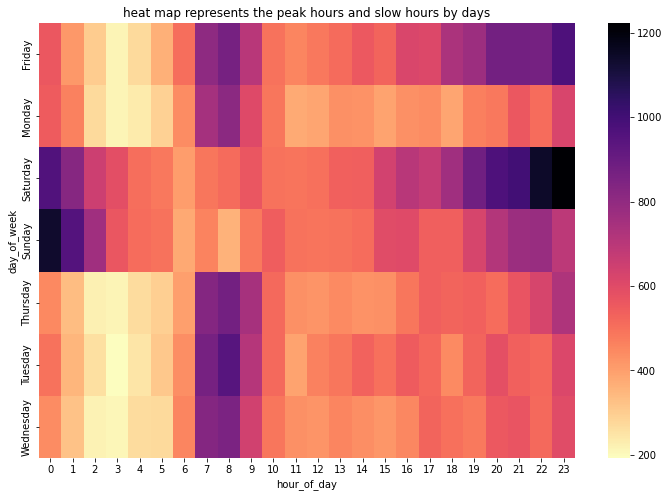

In [39]:
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(dh_cross,cmap='magma_r')
plt.title("heat map represents the peak hours and slow hours by days")

* pick-up Address

In [64]:
common_loc=pd.DataFrame(df1["PICK UP ADDRESS"].value_counts().head(10).reset_index())
common_loc
common_loc.columns=["Address","frequency"]
common_loc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Address    10 non-null     object
 1   frequency  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


Text(0.5, 1.0, 'Most active addresses')

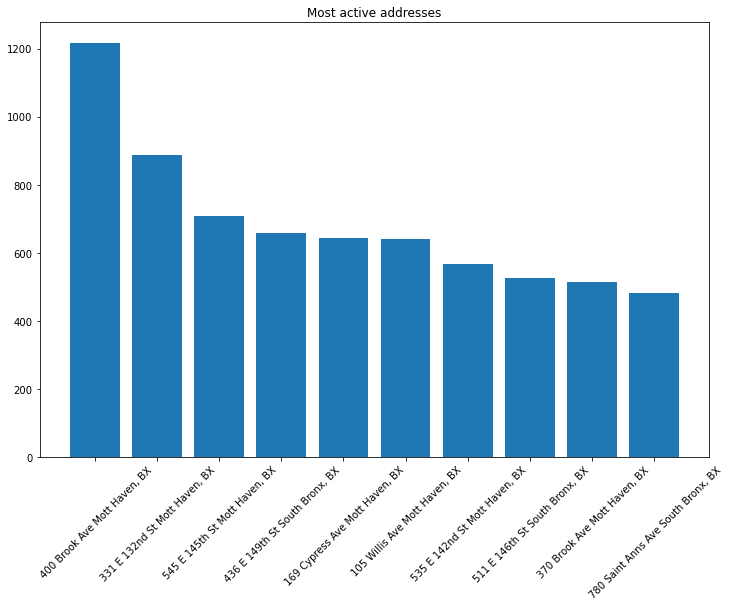

In [84]:
fig,ax=plt.subplots(figsize=(12,8))
plt.bar(data=common_loc,x="Address",height="frequency")
plt.xticks(rotation=45)
plt.title("Most active addresses")